### Import Necessary Libraries

In [18]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from pprint import pprint

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

### Data Preparation

In [4]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1).to(device)
y = (weight * X + bias).to(device)

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]], device='cuda:0'),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]], device='cuda:0'))

In [16]:
X, X[40:]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8000],
         [0.8200],
         [

Another dat of shape (1,100)

In [53]:
weight = 0.3
bias = 0.9

start = 0.001
end = 0.50
step = 0.005

X = torch.arange(start, end, step).unsqueeze(dim=1).to(device)
y = (weight * X + bias).to(device)
X, X.shape, y.shape

(tensor([[0.0010],
         [0.0060],
         [0.0110],
         [0.0160],
         [0.0210],
         [0.0260],
         [0.0310],
         [0.0360],
         [0.0410],
         [0.0460],
         [0.0510],
         [0.0560],
         [0.0610],
         [0.0660],
         [0.0710],
         [0.0760],
         [0.0810],
         [0.0860],
         [0.0910],
         [0.0960],
         [0.1010],
         [0.1060],
         [0.1110],
         [0.1160],
         [0.1210],
         [0.1260],
         [0.1310],
         [0.1360],
         [0.1410],
         [0.1460],
         [0.1510],
         [0.1560],
         [0.1610],
         [0.1660],
         [0.1710],
         [0.1760],
         [0.1810],
         [0.1860],
         [0.1910],
         [0.1960],
         [0.2010],
         [0.2060],
         [0.2110],
         [0.2160],
         [0.2210],
         [0.2260],
         [0.2310],
         [0.2360],
         [0.2410],
         [0.2460],
         [0.2510],
         [0.2560],
         [0.

### Splitting our Data into train and test splits

In [54]:
# Create train/test split
# 80% of data used for training set, 20% for testing
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

### Visualization

In [55]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data.cpu(), train_labels.cpu(),
              c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data.cpu(), test_labels.cpu(),
              c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data.cpu(), predictions.cpu(),
                c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

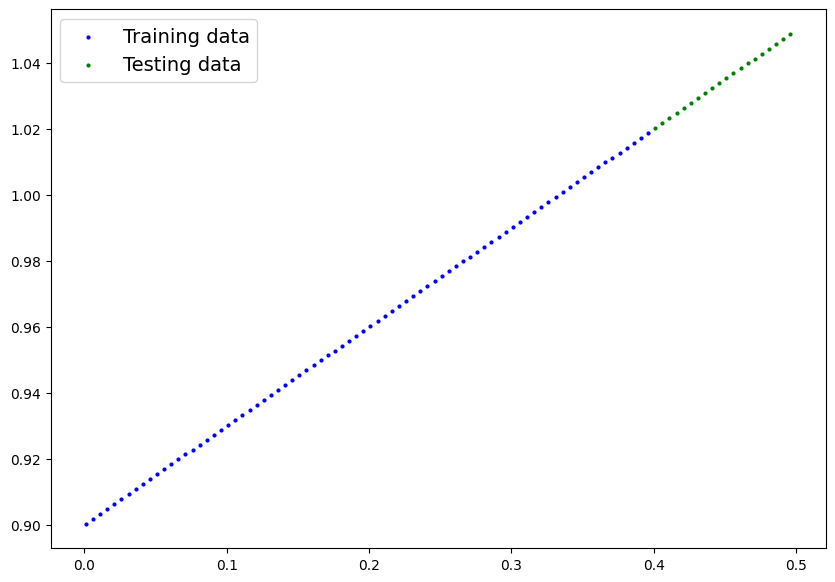

In [56]:
plot_predictions()

### Building a simple linear regression model

In [99]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

instead of explicitly creating our model parameters, we can simply use the pytorch nn.linear which will take care of a linear task

In [7]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [9]:
torch.manual_seed(42)

model_0 = LinearRegressionModelV2().to(device)

list(model_0.parameters())

[Parameter containing:
 tensor([[0.7645]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.8300], device='cuda:0', requires_grad=True)]

In [11]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [134]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367], device='cuda:0')),
             ('bias', tensor([0.1288], device='cuda:0'))])

### Running inference on our model

In [135]:
with torch.inference_mode():
    y_preds = model_0(X_test)

In [136]:
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], device='cuda:0')


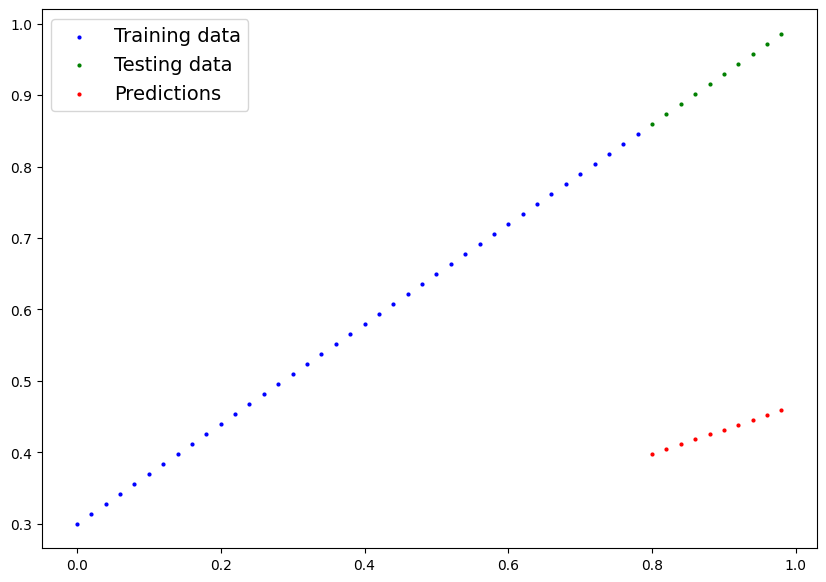

In [144]:
plot_predictions(predictions=y_preds)

### Improving our Model with Loss function and optimizers
Initially our weights adn biases were random values.  
The optimizer with try to reduce the loss as much as it can

In [16]:
loss_fn = nn.L1Loss() 

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.008)

In [57]:
torch.manual_seed(42)

epochs = 1001

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    # Training
    model_0.train()
    y_pred = model_0(X_train)

    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Testing
    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test.type(torch.float))

        if epoch % 100 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().cpu().numpy())
            test_loss_values.append(test_loss.detach().cpu().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}")

Epoch: 0 | MAE Train Loss: 0.5174991488456726 | MAE Test Loss: 0.4098469913005829
Epoch: 100 | MAE Train Loss: 0.04612845182418823 | MAE Test Loss: 0.1118587851524353
Epoch: 200 | MAE Train Loss: 0.038427818566560745 | MAE Test Loss: 0.0949457660317421
Epoch: 300 | MAE Train Loss: 0.030738970264792442 | MAE Test Loss: 0.07585253566503525
Epoch: 400 | MAE Train Loss: 0.02305012382566929 | MAE Test Loss: 0.05675933510065079
Epoch: 500 | MAE Train Loss: 0.015360158868134022 | MAE Test Loss: 0.03766549751162529
Epoch: 600 | MAE Train Loss: 0.007670893799513578 | MAE Test Loss: 0.018789267167448997
Epoch: 700 | MAE Train Loss: 0.005481367465108633 | MAE Test Loss: 0.0007373631233349442
Epoch: 800 | MAE Train Loss: 0.005481367465108633 | MAE Test Loss: 0.0007373631233349442
Epoch: 900 | MAE Train Loss: 0.005481367465108633 | MAE Test Loss: 0.0007373631233349442
Epoch: 1000 | MAE Train Loss: 0.005481367465108633 | MAE Test Loss: 0.0007373631233349442


### Visualizing our model result

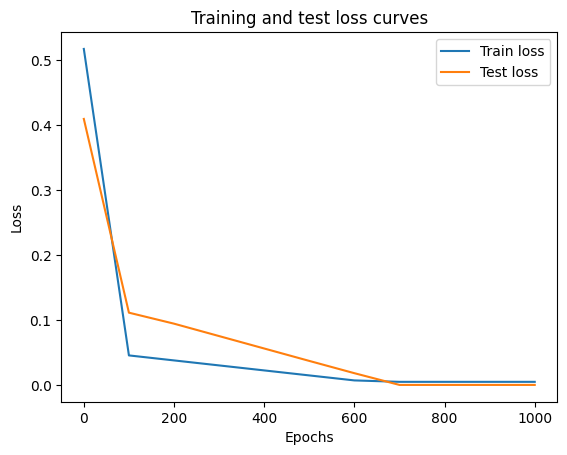

In [58]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [59]:
pprint("The model learned the following values for weights and bias:")
pprint(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

'The model learned the following values for weights and bias:'
OrderedDict([('linear_layer.weight', tensor([[0.3143]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8943], device='cuda:0'))])

And the original values for weights and bias are:
weights: 0.3, bias: 0.9


In [29]:
X_test[len(X_test)-1], y_test[len(y_test)-1]

(tensor([0.9800], device='cuda:0'), tensor([0.9860], device='cuda:0'))

In [60]:
model_0.eval()

with torch.inference_mode():
    model_0.to(device)
    y_preds = model_0(X_test)

In [61]:
y_preds

tensor([[1.0204],
        [1.0219],
        [1.0235],
        [1.0251],
        [1.0266],
        [1.0282],
        [1.0298],
        [1.0314],
        [1.0329],
        [1.0345],
        [1.0361],
        [1.0376],
        [1.0392],
        [1.0408],
        [1.0424],
        [1.0439],
        [1.0455],
        [1.0471],
        [1.0486],
        [1.0502]], device='cuda:0')

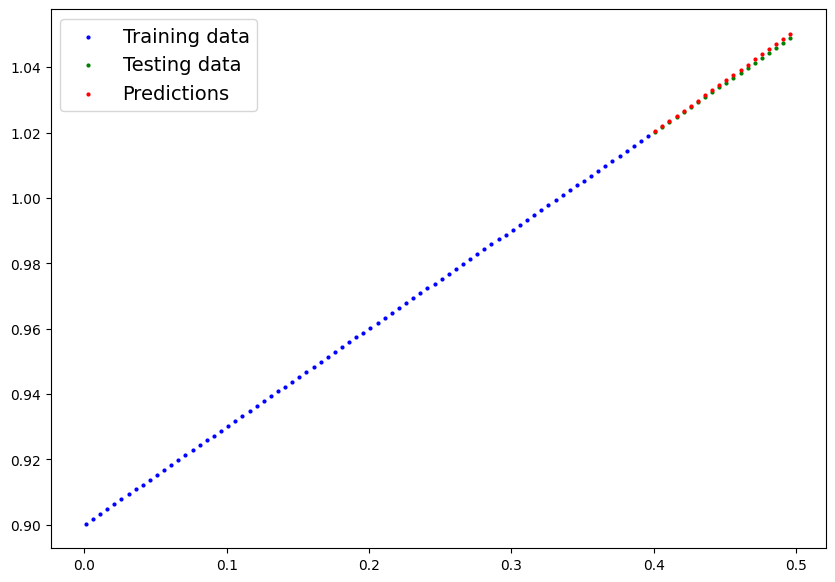

In [62]:
plot_predictions(predictions=y_preds)

In [174]:
loss_fn(y_preds, y_test.type(torch.float)), y_preds, y_test

(tensor(0.0008, device='cuda:0'),
 tensor([[0.8594],
         [0.8734],
         [0.8873],
         [0.9013],
         [0.9153],
         [0.9292],
         [0.9432],
         [0.9572],
         [0.9711],
         [0.9851]], device='cuda:0'),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]], device='cuda:0'))